### 2022年度プログラミング演習A・B

# 第5回レポート課題の解説

### 演習1

---
- 入力：関数$f$、$f$ の微分 $f\_dif$、初期値 $x\_old=x_0$、微小正数 $EPS$、反復回数の上限 $N$

- 出力：反復回数 $n$ と近似解 $x\_new$、または「反復回数の上限を超えた」旨のメッセージ

- Step 1：関数 $f$ と $f\_dif$ を定義する。$x\_old$、$EPS$、$N$ を初期化する。

- Step 2：<span style="color:red">$x\_old$、$f$、$f\_dif$ を用いて $x\_new$ を初期化する。</span>$n=1$ とする。

- Step 3：$|x\_new-x\_old|\geq EPS$ かつ $n\leq N$ の間、次のStep 3-1～3-3を繰り返す。

    - Step 3-1：$x\_old=x\_new$ とする。

    - Step 3-2：<span style="color:red">$x\_old$、$f$、$f\_dif$ を用いて $x\_new$ を更新する。</span>

    - Step 3-3：$n$ に $1$ を加算する。

- Step 4：もし $n>N$ なら、「反復回数の上限を超えた」旨のメッセージを出力する。そうでなければ、反復回数 $n$ と近似解 $x\_new$ を出力する。
---

上記のニュートン法のアルゴリズムを実現するコードを書き、関数 $f(x)=x^2-2$ に対して方程式 $f(x)=0$ の近似解を求めてください。ただし、初期値 $x_0=0.5$、微小正数 $EPS=10^{-10}$、反復回数の上限 $N=20$ とします。

赤字部分における $x\_new$ の初期化・更新の式は、

$$
x\_new=x\_old-\frac{f(x\_old)}{f\_dif(x\_old)}
$$

である。

In [1]:
function value = f(x)
    value = x^2-2;
end

function value = f_dif(x)
    value = 2*x;
end

x_old = 0.5;
EPS = 1E-10;  %10E-10だと10*10^(-10)になってしまうため、注意
N = 20;

x_new = x_old-f(x_old)/f_dif(x_old);
n = 1;

while abs(x_new-x_old) >= EPS && n <= N
    x_old = x_new;
    x_new = x_old-f(x_old)/f_dif(x_old);
    n = n+1;
end

if n > N
    printf("%d回の反復では、近似解を求めることができなかった。\n",N)
else
    printf("%d回の反復で、近似解%.15fを求めることができた。\n",n,x_new)
end

7回の反復で、近似解1.414213562373095を求めることができた。


### 演習2（オプション）

ニュートン法が収束しないような関数と初期値を与えて、それを確認するコードを書いてください。特に、生成された数列の各項（$x\_new$）を画面に出力して、収束しない様子が分かるようにしてください。

「接線の $x$ 切片が数列の次の項になる」というニュートン法の性質からグラフの望まれる形状を考えると、関数

$$
f(x)=\sqrt[3]{x}
$$

に対しては初期値 $x_0$ を適切に与えればニュートン法が収束しないと予想される。実際、

$$
f'(x)=\frac{1}{3\sqrt[3]{x^2}}
$$

であるから、

$$
x_1=x_0-\frac{f(x_0)}{f'(x_0)}=x_0-3x_0=-2x_0
$$

となる。同様の計算から

$$
x_n=(-2)^n x_0
$$

が得られるため、初期値 $x_0\neq 0$ であれば数列 $\{x_n\}$ が振動することが分かる。

In [2]:
function value = f(x)
    value = nthroot(x,3);  %x^(1/3)とすると、x<0のときに虚数になってしまう　nthrootは実数の範囲に限ってn乗根を求める関数
end

function value = f_dif(x)
    value = 1/(3*nthroot(x^2,3));
end

x_old = 1
EPS = 1E-10;
N = 20;

x_new = x_old-f(x_old)/f_dif(x_old)
n = 1;

while abs(x_new-x_old) >= EPS && n <= N
    x_old = x_new;
    x_new = x_old-f(x_old)/f_dif(x_old)
    n = n+1;
end

if n > N
    printf("%d回の反復では、近似解を求めることができなかった。\n",N)
else
    printf("%d回の反復で、近似解%.15fを求めることができた。\n",n,x_new)
end

x_old =  1
x_new = -2
x_new =  4.0000
x_new = -8
x_new =  16
x_new = -32.000
x_new =  64
x_new = -128
x_new =  256.00
x_new = -512
x_new =  1024
x_new = -2048.0
x_new =  4096
x_new = -8192
x_new =  16384.00000
x_new = -32768
x_new =  65536
x_new = -131072.00000
x_new =  262144
x_new = -524288
x_new =  1048576.00000
x_new = -2097152
20回の反復では、近似解を求めることができなかった。


参考までに関数 $y=f(x)$ のグラフと $x$ 軸を描画すると、次のようになる（グラフの描画方法は第1回および第4回の授業資料を参照）。

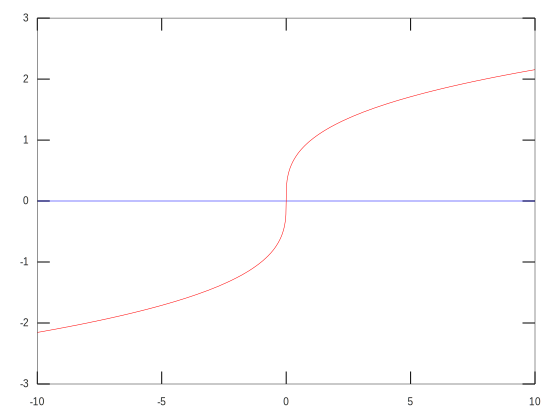

In [3]:
%plot --format svg

x = -10:0.01:10;
y0 = x*0;
y = f(x);

plot(x,y0,"b-")
hold on
plot(x,y,"r-")

### 演習3

セカント法のアルゴリズムを実現するコードを書き、関数 $f(x)=x^2-2$ に対して方程式 $f(x)=0$ の近似解を求めてください。ただし、初期値 $x_{-1}=0.3$、$x_0=0.5$、微小正数 $EPS=10^{-10}$、反復回数の上限 $N=20$ とします。

セカント法のアルゴリズムは、次のようにまとめられる。

---
- 入力：関数$f$、初期値 $x\_old2=x_{-1}$、$x\_old=x_0$、微小正数 $EPS$、反復回数の上限 $N$

- 出力：反復回数 $n$ と近似解 $x\_new$、または「反復回数の上限を超えた」旨のメッセージ

- Step 1：関数 $f$ を定義する。$x\_old2$、$x\_old$、$EPS$、$N$ を初期化する。

- Step 2：$x\_new=x\_old-\frac{f(x\_old)(x\_old-x\_old2)}{f(x\_old)-f(x\_old2)}$ とする。$n=1$ とする。

- Step 3：$|x\_new-x\_old|\geq EPS$ かつ $n\leq N$ の間、次のStep 3-1～3-4を繰り返す。

    - Step 3-1：$x\_old2=x\_old$ とする。

    - Step 3-2：$x\_old=x\_new$ とする。

    - Step 3-3：$x\_new=x\_old-\frac{f(x\_old)(x\_old-x\_old2)}{f(x\_old)-f(x\_old2)}$ とする。

    - Step 3-4：$n$ に $1$ を加算する。

- Step 4：もし $n>N$ なら、「反復回数の上限を超えた」旨のメッセージを出力する。そうでなければ、反復回数 $n$ と近似解 $x\_new$ を出力する。
---

In [4]:
function value = f(x)
    value = x^2-2;
end

x_old2 = 0.3;
x_old = 0.5;
EPS = 1E-10;
N = 20;

x_new = x_old-f(x_old)*(x_old-x_old2)/(f(x_old)-f(x_old2));
n = 1;

while abs(x_new-x_old) >= EPS && n <= N
    x_old2 = x_old;
    x_old = x_new;
    x_new = x_old-f(x_old)*(x_old-x_old2)/(f(x_old)-f(x_old2));
    n = n+1;
end

if n > N
    printf("%d回の反復では、近似解を求めることができなかった。\n",N)
else
    printf("%d回の反復で、近似解%.15fを求めることができた。\n",n,x_new)
end

9回の反復で、近似解1.414213562373095を求めることができた。


なお、以前の二分法に関する演習と同様に、関数 $f$ の値の計算回数を最小限にするように新たな変数を用意してコードを改良すると、現状の $3n$ 回を $(n+1)$ 回に抑えることができる。